In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle
#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [7]:
def simonCircuit(b):
    n = len(b)
    circ = QuantumCircuit(2*n, 2*n)
    circ.h(range(n))
    
    circ.barrier()
    circ += simon_oracle(b)
    circ.barrier()
    circ.measure(range(n, 2*n), range(n, 2*n))
    circ.barrier()
    
    circ.h(range(n))
    circ.measure(range(n), range(n))
    return circ
    
    

In [14]:
circuit = simonCircuit('10')

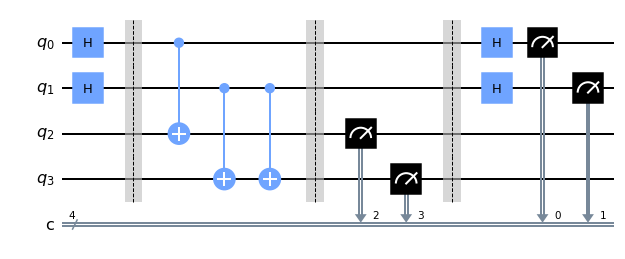

In [15]:
circuit.draw('mpl')

In [16]:
w = getHisto(1024, circuit)


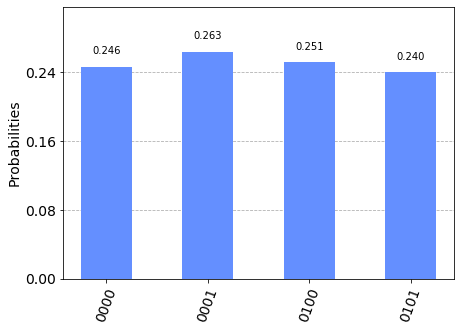

In [17]:
plot_histogram(w)

In [19]:
for z in w:
    print(z[2:])

00
01
00
01


In [ ]:
#000, 001, 110, 111 -> 110
#00, 01 -> 10